# Modelling and insights :


##### Training the data and generating insights

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv(r'C:\Users\borrasai\Documents\airbnb_train_dataset.csv')

In [3]:
df

,available,price,minimum_nights,maximum_nights,room_type,accomodates,bedrooms,beds,total_reviews,join_age,no_of_bath
0,0.0,166.67,1.00,60.0,Hotel room,2,1.000000,1.0,2.0,4241,1.0
1,0.0,175.00,1.67,1125.0,Hotel room,2,1.000000,1.0,2.0,4241,1.0
2,1.0,215.00,3.00,1125.0,Entire home/apt,4,2.000000,2.0,6.0,4241,1.5
3,1.0,200.00,2.00,1125.0,Entire home/apt,4,2.000000,2.0,15.0,4241,1.5
4,1.0,150.00,2.00,1125.0,Entire home/apt,4,2.000000,2.0,120.0,3999,2.5
...,...,...,...,...,...,...,...,...,...,...,...
1740,1.0,50.00,1.00,365.0,Entire home/apt,2,1.000000,1.0,0.0,1578,1.0
1741,1.0,88.00,3.00,365.0,Entire home/apt,2,1.000000,1.0,0.0,2388,1.5
1742,1.0,49.00,20.00,1125.0,Entire home/apt,2,1.055402,1.0,0.0,2159,1.0
1743,1.0,990.00,2.00,1125.0,Entire home/apt,16,7.000000,33.0,0.0,511,7.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1745 entries, 0 to 1744
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   available       1745 non-null   float64
 1   price           1745 non-null   float64
 2   minimum_nights  1745 non-null   float64
 3   maximum_nights  1745 non-null   float64
 4   room_type       1745 non-null   object 
 5   accomodates     1745 non-null   int64  
 6   bedrooms        1745 non-null   float64
 7   beds            1745 non-null   float64
 8   total_reviews   1745 non-null   float64
 9   join_age        1745 non-null   int64  
 10  no_of_bath      1745 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 150.1+ KB


### Converting data to categorical

In [5]:
df['available'] = pd.Categorical(df.available)
df['room_type'] = pd.Categorical(df.room_type)
df['accomodates'] = pd.Categorical(df.accomodates)
df['bedrooms'] = pd.Categorical(df.bedrooms)
df['beds'] = pd.Categorical(df.beds)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1745 entries, 0 to 1744
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   available       1745 non-null   category
 1   price           1745 non-null   float64 
 2   minimum_nights  1745 non-null   float64 
 3   maximum_nights  1745 non-null   float64 
 4   room_type       1745 non-null   category
 5   accomodates     1745 non-null   category
 6   bedrooms        1745 non-null   category
 7   beds            1745 non-null   category
 8   total_reviews   1745 non-null   float64 
 9   join_age        1745 non-null   int64   
 10  no_of_bath      1745 non-null   float64 
dtypes: category(5), float64(5), int64(1)
memory usage: 92.9 KB


## Train Test Split


In [7]:
from sklearn.model_selection import train_test_split
from math import sqrt

In [8]:
df = pd.get_dummies(df)

In [9]:
X = df.drop(['price'],axis=1)
y = df['price']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Modelling the data

#### Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [12]:
reg = LinearRegression()
model = reg.fit(X_train, y_train)

In [13]:
model.score(X_train, y_train)

0.2784360830744177

In [14]:
model.intercept_

129.5525754256359

In [15]:
model.coef_

array([-8.17697563e-02,  1.11654523e-02, -1.39769767e-01, -2.10131954e-02,
        5.51816673e+01, -1.44438560e+01,  3.95594513e+01, -1.45364927e+00,
       -2.36619461e+01, -7.40734816e+00,  3.25951988e+01,  9.93158268e+00,
       -3.51194333e+01, -1.05788207e+02, -4.79272263e+01, -4.28949764e+01,
       -2.12786253e+01, -4.38157160e+01, -7.36594670e+00, -1.45773957e+01,
        7.22719015e+01, -3.70138116e+01,  4.00061047e+01, -1.61943483e+01,
       -6.64045999e+01, -1.46469865e+02, -9.18763362e+01,  5.29329049e+02,
       -2.84331306e+02, -2.84329468e+02, -3.05648525e+02, -3.01947543e+02,
       -2.29020686e+02, -2.66010066e+02,  1.07653213e+02, -4.18998024e+02,
       -3.09393871e+02, -2.08555225e+02, -2.83028341e+02, -7.34047701e+01,
        2.59204757e+02,  9.89981298e+02, -2.10327608e+02,  2.69279943e+03,
        4.68009188e+02, -9.56888798e+02, -3.85763650e+02,  4.54747351e-13,
        3.06835193e+02,  5.40297260e+02,  2.54975715e+02,  2.74547326e+02,
        2.84967964e+02,  

In [16]:
predicted = model.predict(X_test)

In [17]:
mse = mean_squared_error(y_test, predicted)
mse

41344.82428885469

In [18]:
rmse = sqrt(mse)
rmse

203.33426737481975

In [19]:
# Making a Dataframe for scores
df_score = pd.DataFrame({"Linear Regression":[rmse]})
df_score

,Linear Regression
0,203.334267


## Regressor Tree 

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
regressor = DecisionTreeRegressor(random_state=0)

In [22]:
model = regressor.fit(X_train, y_train)

In [23]:
model

DecisionTreeRegressor(random_state=0)

In [24]:
predicted = model.predict(X_test)

In [25]:
mse = mean_squared_error(y_test, predicted)
mse

245056.19821790617

In [26]:
rmse = sqrt(mse)
rmse

495.0315123483617

#### the model didnt give postive results compared to Linear regression

In [27]:
# Adding to the Dataframe for scores
df_score["Decision Tree"] = [rmse]
df_score

,Linear Regression,Decision Tree
0,203.334267,495.031512


## Random Forest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)

In [29]:
model = regr.fit(X_train, y_train)
model

RandomForestRegressor(max_depth=2, random_state=0)

In [30]:
predicted = model.predict(X_test)

In [31]:
mse = mean_squared_error(y_test, predicted)
mse

18531.374510240177

In [32]:
rmse = sqrt(mse)
rmse

136.12999122250827

In [33]:
# Adding to the Dataframe for scores
df_score["Random Forest"] = [rmse]
df_score

,Linear Regression,Decision Tree,Random Forest
0,203.334267,495.031512,136.129991


#### Random forest has given good score..so far better compared to other two

## GBM

#### Trying the last option of Gradient Boosting Regressor against given dataset and check if we get good results

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)

In [35]:
model = reg.fit(X_train, y_train)
model

GradientBoostingRegressor(random_state=0)

In [36]:
predicted = model.predict(X_test)

In [37]:
mse = mean_squared_error(y_test, predicted)
mse

17041.037859431923

In [38]:
rmse = sqrt(mse)
rmse

130.54132625123708

In [39]:
# Adding to the Dataframe for scores
df_score["Gradient Boosting"] = [rmse]
df_score

,Linear Regression,Decision Tree,Random Forest,Gradient Boosting
0,203.334267,495.031512,136.129991,130.541326


#### The models so far have given a good score. We will try to rework the models by using the initial values as numerical instead of categoricals, to check if the scores improve.

In [41]:
df = pd.read_csv(r'C:\Users\borrasai\Documents\airbnb_train_dataset.csv')
df['room_type'] = pd.Categorical(df.room_type)

df = pd.get_dummies(df)

X = df.drop(['price'],axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Linear Regression

In [42]:
reg = LinearRegression()
model = reg.fit(X_train, y_train)
model.score(X_train, y_train)
predicted = model.predict(X_test)

# Calculating the RMSE
mse = mean_squared_error(y_test, predicted)
mse

rmse = sqrt(mse)
rmse

123.57140782539223

In [44]:
# Appending to our score df
df_score.loc[1] = [0,0,0,0]
df_score.iloc[1,0] = rmse
df_score

,Linear Regression,Decision Tree,Random Forest,Gradient Boosting
0,203.334267,495.031512,136.129991,130.541326
1,123.571408,0.000000,0.000000,0.000000


## Decision Tree Regressor

In [45]:
regressor = DecisionTreeRegressor(random_state=0)
model = regressor.fit(X_train, y_train)

# Getting the predictions
predicted = model.predict(X_test)

# Calculating the RMSE
mse = mean_squared_error(y_test, predicted)
mse

rmse = sqrt(mse)
rmse

512.9431153807732

In [46]:
# Updating the score sheet
df_score.iloc[1,1] = rmse
df_score

,Linear Regression,Decision Tree,Random Forest,Gradient Boosting
0,203.334267,495.031512,136.129991,130.541326
1,123.571408,512.943115,0.000000,0.000000


## Random Forest Regressor



In [47]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
model = regr.fit(X_train, y_train)

# Getting the predictions
predicted = model.predict(X_test)

# Calculating the RMSE

mse = mean_squared_error(y_test, predicted)
mse

rmse = sqrt(mse)
rmse

146.2019725594644

In [48]:
# Updating the score sheet
df_score.iloc[1,2] = rmse
df_score

,Linear Regression,Decision Tree,Random Forest,Gradient Boosting
0,203.334267,495.031512,136.129991,130.541326
1,123.571408,512.943115,146.201973,0.000000


## Gradient Boosting Regressor

In [49]:
reg = GradientBoostingRegressor(random_state=0)
model = reg.fit(X_train, y_train)

# Getting the predictions
predicted = model.predict(X_test)

# Calculating the RMSE

mse = mean_squared_error(y_test, predicted)
mse

rmse = sqrt(mse)
rmse

161.77259521722635

In [50]:
# Updating the score sheet
df_score.iloc[1,3] = rmse
df_score

,Linear Regression,Decision Tree,Random Forest,Gradient Boosting
0,203.334267,495.031512,136.129991,130.541326
1,123.571408,512.943115,146.201973,161.772595


#### Post reverting the data back to numeric, we have observed a drop in the error for Linear Regression model. However, error in remaining models have spiked.

<AxesSubplot:>

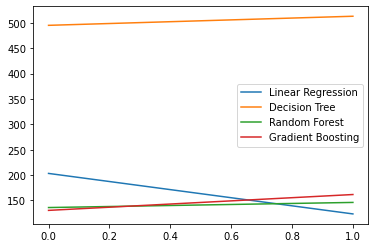

In [51]:
df_score.plot()